In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
a = open('movies.txt',encoding = "ISO-8859-1")
a = a.readlines()
print(a)

['1\tToy Story (1995)\t0\t0\t0\t1\t1\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\n', '2\tGoldenEye (1995)\t0\t1\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\n', '3\tFour Rooms (1995)\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\n', '4\tGet Shorty (1995)\t0\t1\t0\t0\t0\t1\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\n', '5\tCopycat (1995)\t0\t0\t0\t0\t0\t0\t1\t0\t1\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\n', '6\tShanghai Triad (Yao a yao yao dao waipo qiao) (1995)\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\n', '7\tTwelve Monkeys (1995)\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\n', '8\tBabe (1995)\t0\t0\t0\t0\t1\t1\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\n', '9\tDead Man Walking (1995)\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\n', '10\tRichard III (1995)\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\n', '11\tSeven (Se7en) (1995)\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\n', '12\t"Usual Suspects, The (1995)"\t0\t0\t0\t0\

# Importing Data

In [8]:
movies = np.zeros((1682, 20)) # contains all data about movies except title
mov_ind_to_tit = ['NO MOVIE HERE AT ID + 0'] # Contains at each index in the array the title of the movie which corresponds 
                                              # to the movie ID number in movies.txt, or the first column of movies
ratings = np.loadtxt('data.txt') # contains movie rating data in the form: User ID, Movie ID, Rating
col = 0
for line in open('movies.txt', encoding = "ISO-8859-1").readlines():
    splt = line.split('\t')
    mov_ind_to_tit.append(splt[1])
    for i in range(len(splt)):
        if(i == 0):
            movies[col][i] = int(splt[i])
        elif(i > 1):
            movies[col][i - 1] = int(splt[i])
            
        
    col += 1

# 4) Basic Visualizations

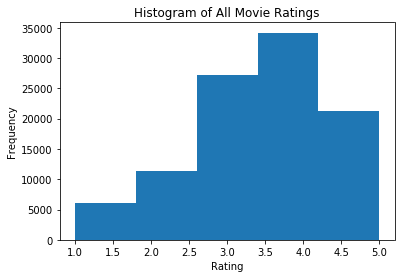

In [10]:
# This is part 1 of the basic visualizations: Histogram of all movie ratings

all_ratings = np.array([ratings[i][2] for i in range(len(ratings))])
plt.hist(all_ratings, bins = 5)
plt.title("Histogram of All Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 '"English Patient, The (1996)"' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)']


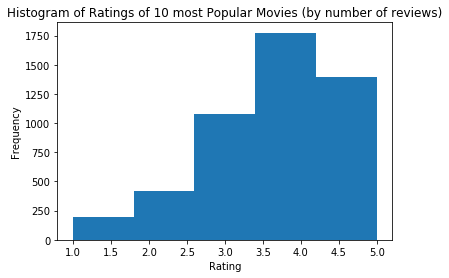

In [11]:
# This is part 2 of the basic visualizations: Histogram ofthe most popular movies

all_movs = [ratings[i][1] for i in range(len(ratings))] # list of all movie ids from all ratings in ratings 
counts = np.bincount(all_movs) # counts the frequency of each movie, stores frequency of i in counts[i]
top_ten = counts.argsort()[-10:][::-1] # index of top 10 most popular movies in all_movs
mov_ind_nump = np.array(mov_ind_to_tit)
print(mov_ind_nump[top_ten])  # This shows what the top 10 movies actually are.

top_ten_rates = []
for i in range(len(ratings)):
    if ratings[i][1] in top_ten:
        top_ten_rates.append(ratings[i][2])

plt.hist(top_ten_rates, bins = 5)
plt.title("Histogram of Ratings of 10 most Popular Movies (by number of reviews)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

[[1189.0, 5.0], [1500.0, 5.0], [814.0, 5.0], [1536.0, 5.0], [1293.0, 5.0], [1599.0, 5.0], [1653.0, 5.0], [1467.0, 5.0], [1122.0, 5.0], [1201.0, 5.0]]


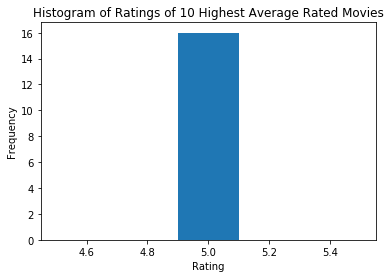

In [18]:
# This is part 3 of the basic visualizations: Histogram of highest rated movies
# note that all of these movies only have 1 review, so their average rating is 5.0

avg_ratings = {} # Dict with form Key = movie ID, val = [total of all ratings, number of ratings, avg rating]
for i in range(len(ratings)):
    if (ratings[i][1] not in avg_ratings.keys()):
        avg_ratings[ratings[i][1]] = [ratings[i][2], 1, ratings[i][2]]
    else: 
        temp = avg_ratings[ratings[i][1]][:]
        temp[0] = temp[0] + ratings[i][2]
        temp[1] = temp[1] + 1
        temp[2] = temp[0] / temp[1]
        avg_ratings[ratings[i][1]] = temp
# the following code finds the top 10 averages
t_ten_avgs = []
t_ten_avgs_index = []
for i in range(10):
    top = 0
    index = 123456789
    for key in avg_ratings.keys():
        if(avg_ratings[key][2] > top):
            top = avg_ratings[key][2]
            index = key
    del avg_ratings[index]
    t_ten_avgs.append([index, top])
    t_ten_avgs_index.append(index)
tten_avg_hist = []

for i in range(len(ratings)):
    if ratings[i][1] in t_ten_avgs_index:
        tten_avg_hist.append(ratings[i][2])
print(t_ten_avgs)
plt.hist(tten_avg_hist, bins = 5)
plt.title("Histogram of Ratings of 10 Highest Average Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

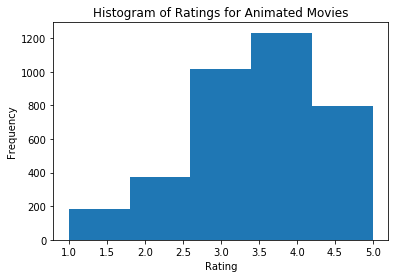

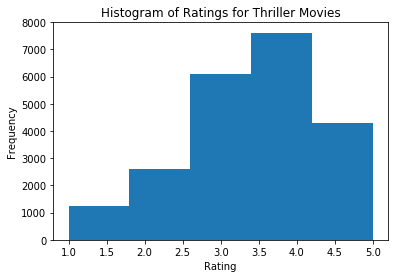

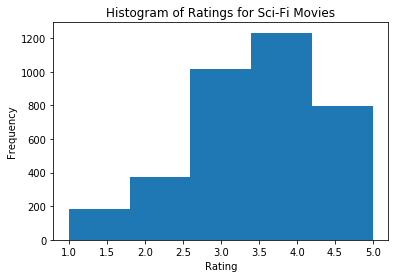

In [126]:
def get_movies_genre(genre):
    '''
    Given an integer genre as described by the following table, selects all movies
    from the array 'movies' which are of that genre (movies can have multiple genres)
    returns a list of indecies of said movies
    
    {1: Unknown, 2: Action, 3: Adventure, 4: Animation, 5: Children’s, 6: Comedy, 
     7: Crime, 8: Documentary, 9: Drama, 10: Fantasy, 11: Film-Noir, 12: Horror,
     13: Musical, 14: Mystery, 15: Romance, 16: Sci-Fi, 17: Thriller, 18: War, 19:Western}
    '''
    lst = []
    for movie in movies:
        if(movie[genre] == 1):
            lst.append(movie[0])
    return lst

animated = get_movies_genre(4)
thriller = get_movies_genre(17)
sci_fi   = get_movies_genre(16)

animated_hist = []
thriller_hist = []
sci_fi_hist   = []

for i in range(len(ratings)):
    if(ratings[i][1] in animated):
        animated_hist.append(ratings[i][2])
    if(ratings[i][1] in thriller):
        thriller_hist.append(ratings[i][2])
    if(ratings[i][1] in animated):
        sci_fi_hist.append(ratings[i][2])
        
        
plt.hist(animated_hist, bins = 5)
plt.title("Histogram of Ratings for Animated Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


plt.hist(thriller_hist, bins = 5)
plt.title("Histogram of Ratings for Thriller Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


plt.hist(sci_fi_hist, bins = 5)
plt.title("Histogram of Ratings for Sci-Fi Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()